In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join
from astropy.wcs import WCS

In [91]:
# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 5

In [92]:
# Reduced data in txt files
red_dat_path = "A:/Documents/Grad_School/Research/igrins_reduced_text/"
fig_path = "A:/Documents/Grad_School/Research/"
# Glob the H band txt files
k_spec_files = glob.glob(red_dat_path+"*_K_*.txt")

In [100]:
# # Just sorting the files, might not be necessary
# k_spec_files.sort()
# k_spec_files

In [94]:
# # List of Class 3 Standards from MasterObservationList
# # Spectral Types range from K1 to M6
# # Will try to put to good use later
# standards_list = [
# "Haro 6-13",
# "HBC 359",
# "HBC 376",
# "HBC 427",
# "HD 286178",
# "HQ Tau",
# "Hubble 4",
# "JH 433",
# "JH 507",
# "JH108",
# "LkCa1",
# "LkCa14",
# "LkCa4",
# "MHO 7",
# "MHO 8",
# ]
# # standards_list = standards_list.sort()

In [95]:
# Preliminary look at MHO7, an M5 spectral type in Taurus, total int time of 300
mho7_files = glob.glob(red_dat_path+"*mho7*_k_*")
mho7_files

['A:/Documents/Grad_School/Research/igrins_reduced_text\\MHO7_20171231_K_0055_spec_A0v.txt',
 'A:/Documents/Grad_School/Research/igrins_reduced_text\\MHO7_20171231_K_0063_spec_A0v.txt']

In [96]:
# Use pandas to read the .txt file and create a data frame
# Skip first few lines of header, change "-NaN" to NaN in the signal-to-noise columns
mho7_df = pd.read_csv(mho7_files[0],skiprows=7, delim_whitespace=True,na_values=['-NaN'])
# Make column names
mho7_df.columns = ["Spectral Index", "Wavelength", "Flux", "SNR"]
# Define thresholds for SNR and Flux
snr_threshold = 5
flux_threshold = 0
# Do the selection using pandas dataframe magic
mho7_df = mho7_df[(mho7_df["SNR"] > snr_threshold) & (mho7_df["Flux"] > flux_threshold)]
mho7_df

,Spectral Index,Wavelength,Flux,SNR
1774,0.0,1.86992,5798310.0,6.07514
1777,0.0,1.86996,3364900.0,7.01000
1782,0.0,1.87001,2033110.0,5.81243
1783,0.0,1.87002,2728550.0,5.45719
1788,0.0,1.87008,3440690.0,5.31481
...,...,...,...,...
51136,24.0,2.48329,111531.0,5.82226
51198,24.0,2.48419,92056.1,32.14820
51801,25.0,2.49550,147510.0,5.30581
51892,25.0,2.49708,148042.0,5.66243


In [97]:
# Wavelength (microns)
mho7_wavlen = mho7_df['Wavelength']
# Flux (counts)
mho7_flux = mho7_df['Flux']

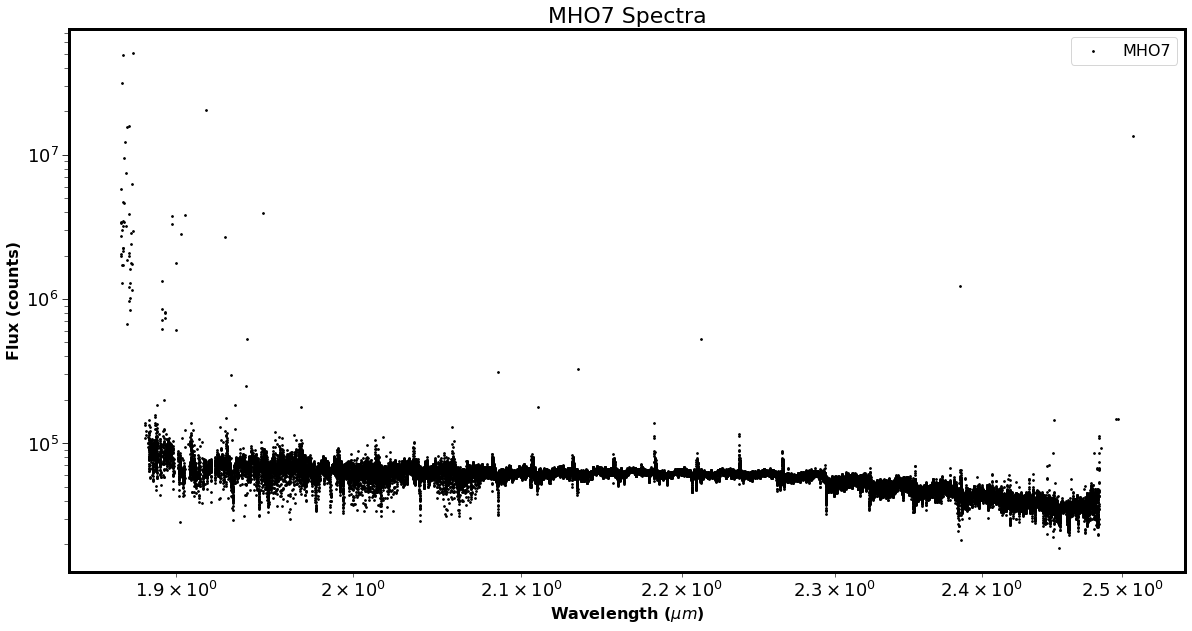

In [99]:
# for wavlen,flux in zip(mho7_wavlen,mho7_flux):

fig,ax = plt.subplots(figsize=(20,10))

# Plot wavelength vs flux
# there is definitely a way to do this with a for loop but oh well
ax.scatter(mho7_wavlen, mho7_flux,label="MHO7",s=3,c="black")

# ax.set_xlim(1.55,1.56)
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='best')

ax.set_title("MHO7 Spectra", fontsize = 22)
ax.set_xlabel('Wavelength ($\mu m$)',fontsize=16)
ax.set_ylabel('Flux (counts)',fontsize=16)

plt.savefig(fig_path + "MHO7_igrins_spectra" + '.png',facecolor='white')
plt.show()